In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_csv(r'C:\Users\naren\Desktop\DESKTOP MAMTA\Bsc Projects\ml projects\loan_data_set.csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

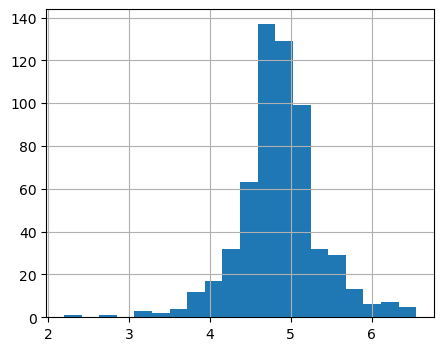

In [11]:
#skip rows that have missing values
df['loanAmount_log'] = np.log(df['LoanAmount'])
plt.figure(figsize =(5,4))
df['loanAmount_log'].hist(bins = 20)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<AxesSubplot: >

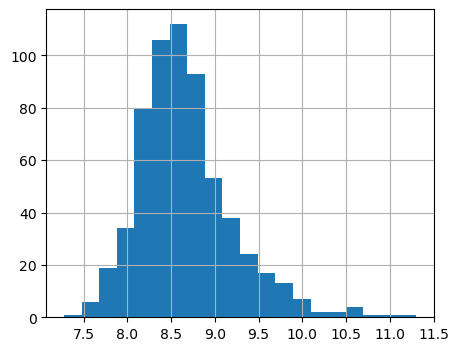

In [13]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
plt.figure(figsize=(5,4))
df['TotalIncome_log'].hist(bins = 20)

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace =True)
df['Married'].fillna(df['Married'].mode()[0],inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace =True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace =True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace =True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace =True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [21]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values
x,y

(array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
        ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
        ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
        ...,
        ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
        ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
        ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
       dtype=object),
 array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
        'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',

In [22]:
print("percentage of missing gender is %2f%%"%((df['Gender'].isnull().sum()/df.shape[0])*100))

percentage of missing gender is 0.000000%


number of people who take loan as group by gender: 
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

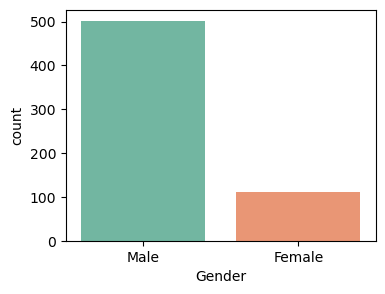

In [28]:
print("number of people who take loan as group by gender: ")
print(df['Gender'].value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x='Gender',data=df, palette = 'Set2')

number of people who take loan as group by marital status: 
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot: xlabel='Married', ylabel='count'>

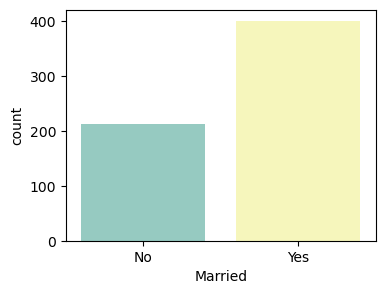

In [30]:
print("number of people who take loan as group by marital status: ")
print(df['Married'].value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x='Married',data=df, palette = 'Set3')

number of people who take loan as group by dependents: 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot: xlabel='Dependents', ylabel='count'>

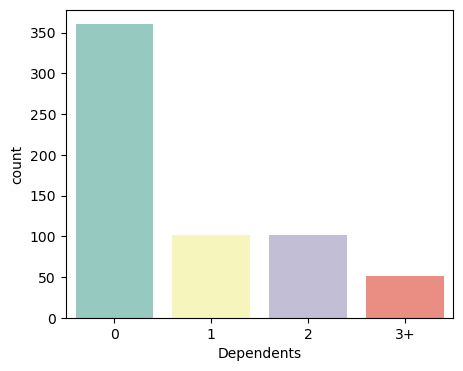

In [33]:
print("number of people who take loan as group by dependents: ")
print(df['Dependents'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x='Dependents',data=df, palette = 'Set3')

number of people who take loan as group by self employed: 
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

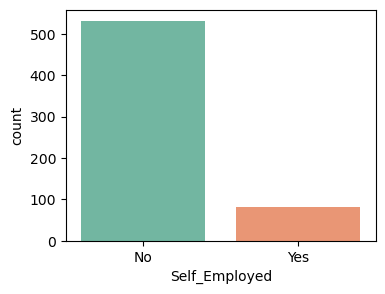

In [34]:
print("number of people who take loan as group by self employed: ")
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x='Self_Employed',data=df, palette = 'Set2')

number of people who take loan as group by loan amount: 


<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

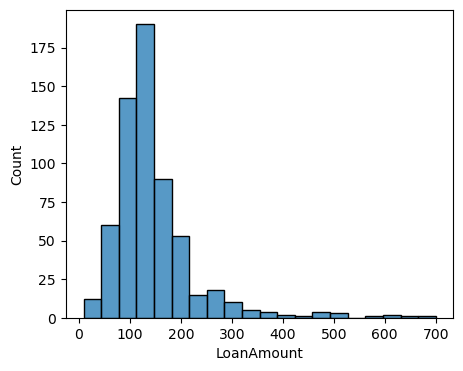

In [39]:
print("number of people who take loan as group by loan amount: ")
plt.figure(figsize=(5,4))
sns.histplot(data = df,x ='LoanAmount',bins =20)

number of people who take loan as group by credit history: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot: xlabel='Credit_History', ylabel='count'>

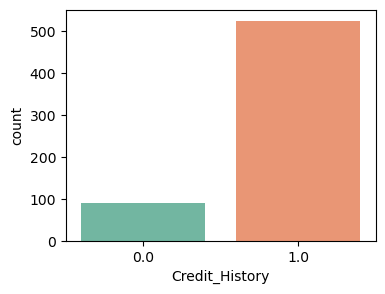

In [40]:
print("number of people who take loan as group by credit history: ")
print(df['Credit_History'].value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x='Credit_History',data=df, palette = 'Set2')

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state =0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [44]:
for i in range(0,5):
    x_train[:,i] = Labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7] = Labelencoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [45]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [46]:
for i in range(0,5):
    x_test[:,i] = Labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7] = Labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [50]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
from sklearn import metrics
y_pred = rf_clf.predict(x_test)

print("Accuracy of random forest classifier is", metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy of random forest classifier is 0.7723577235772358


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [60]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred = nb_clf.predict(x_test)
print("Accuracy of naive bayes is", metrics.accuracy_score(y_pred,y_test))

Accuracy of naive bayes is 0.8292682926829268


In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dt_clf.predict(x_test)
print("Accuracy of decision tree is", metrics.accuracy_score(y_pred,y_test))

Accuracy of decision tree is 0.7235772357723578


In [67]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred = kn_clf.predict(x_test)
print("Accuracy of KN is", metrics.accuracy_score(y_pred,y_test))

Accuracy of KN is 0.7967479674796748


In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = kn_clf.predict(x_test)
print("Accuracy of LR is", metrics.accuracy_score(y_pred,y_test))

Accuracy of LR is 0.7967479674796748


In [102]:
#The best accuracy is of Gaussian Naive Bayes among all the algorithms
#using adaboost classifier to improve the accuracy
from sklearn.ensemble import BaggingClassifier
nb = GaussianNB()
model = BaggingClassifier(estimator = nb, n_estimators = 100,max_samples = 100,bootstrap_features = True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_pred,y_test))

Accuracy is 0.8292682926829268


In [106]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator = SVC(),n_estimators = 100,random_state=0).fit(x_train,y_train)
clf.score(x_test,y_test)

0.8292682926829268

MANUAL TESTING

In [112]:
#The best accuracy is of Gaussian Naive Bayes among all the algorithms, we will be using it for manual testing

x[:,2:]

array([['0', 'Graduate', 360.0, 1.0, 4.857444178729353, 5849.0],
       ['1', 'Graduate', 360.0, 1.0, 4.852030263919617, 6091.0],
       ['0', 'Graduate', 360.0, 1.0, 4.189654742026425, 3000.0],
       ...,
       ['1', 'Graduate', 360.0, 1.0, 5.53338948872752, 8312.0],
       ['2', 'Graduate', 360.0, 1.0, 5.231108616854587, 7583.0],
       ['0', 'Graduate', 360.0, 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [114]:
df.iloc[:,np.r_[1:5,9:11,13:15]].columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term',
       'Credit_History', 'loanAmount_log', 'TotalIncome'],
      dtype='object')

In [ ]:
applicant = [str(input("Gender: ")),str(input("Marital Status (Yes/No): ")),int(input("Dependents: ")),
             str(input("Education: ")), int(input("Loan Amount Term: ")), int(input('Credit History (yes =1,no=0): ')),
             np.log(int(input("Loan Amount: "))), int(input("Applicant's Income: "))+int(input("Coapplicant's Income: "))]
nb_clf.predict(applicant)